In [ ]:
import torch

# Define the device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


## **To train**

Model will ask for dfs, val dataloader, train dataloader images processed as 224*224and  normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]).

 *Depends of the model you choose.

If model needs other size for images then you have to create tensors again with new sizes.

**dfs**

In [ ]:
from google.colab import drive
import os

# load dfs
base_path = "/content/drive/MyDrive/Diagnovision/filtered_df"
csv_files = ["train_df.csv", "val_df.csv", "test_df.csv"]

# Verify if the files exist
for file in csv_files:
    path = os.path.join(base_path, file)
    if os.path.exists(path):
        print(f"{file} found.")
    else:
        print(f"⚠ ERROR: {file} Not found.")

train_df.csv found.
val_df.csv found.
test_df.csv found.


**tensor folder files**


*make sure the code to find the tensors or .pt, scans subfolders since .pt its going to be int the last root subfolder.

In [ ]:
# Tensors (Preprocessed Images)
tensor_save_folder = "/content/drive/MyDrive/Diagnovision/preprocessed_tensors"

## **dataloaders**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

# Cargar dataset de entrenamiento como memory-mapped tensor
train_tensor_path = "/content/drive/MyDrive/Diagnovision/filtered_df/tensor_df/train_tensor_df.pt"
all_data = torch.load(train_tensor_path, map_location="cpu")

class MemoryMappedDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

train_dataset = MemoryMappedDataset(all_data)
train_dataloader = DataLoader(train_dataset, batch_size=12, shuffle=True)

# Cargar dataset de validación como memory-mapped tensor
val_tensor_path = "/content/drive/MyDrive/Diagnovision/filtered_df/tensor_df/val_tensor_df.pt"
all_val_data = torch.load(val_tensor_path, map_location="cpu")

val_dataset = MemoryMappedDataset(all_val_data)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)

print("✅ DataLoaders reconstruidos correctamente.")


<ipython-input-5-282d915ebc5d>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  all_data = torch.load(train_tensor_path, map_location="cpu")
<ipython-input-5-282d915ebc5d>:2

✅ DataLoaders reconstruidos correctamente.


## **efficient 0303**

In [ ]:
!pip install scikit-learn

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Using device: cuda
Starting training process...
Loading data from CSV files...
Loaded datasets:
  Training: 34048 samples
  Validation: 7296 samples
  Test: 7297 samples
Found 13 label columns: ['Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity', 'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis', 'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture', 'clean_impression']
Converting column clean_impression from object to numeric...
Converting column clean_impression from object to numeric...
Converting column clean_impression from object to numeric...

Label distribution in training set:
  Enlarged Cardiomediastinum: 1948.0 positive samples (5.72%)
  Cardiomegaly: 3623.0 positive samples (10.64%)
  Lung Opacity: 14742.0 positive samples (43.30%)
  Lung Lesion: 1334.0 positive samples (3.92%)
  Edema: 7396.0 positive samples

Evaluating: 100%|██████████| 228/228 [00:06<00:00, 37.65it/s]



Epoch 1 Validation Results:
Loss: 0.0788
Macro F1: 0.1908
Macro Precision: 0.1175
Macro Recall: 0.9231
Macro ROC AUC: 0.4999
Best Threshold: 0.10

Performance at different thresholds (Macro F1):
  Threshold 0.1: F1=0.1908, Precision=0.1175, Recall=0.9231
  Threshold 0.2: F1=0.1889, Precision=0.1166, Recall=0.8032
  Threshold 0.3: F1=0.1456, Precision=0.0937, Recall=0.3846
  Threshold 0.4: F1=0.1034, Precision=0.0732, Recall=0.1827
  Threshold 0.5: F1=0.0012, Precision=0.0282, Recall=0.0006
  Threshold 0.6: F1=0.0000, Precision=0.0000, Recall=0.0000
  Threshold 0.7: F1=0.0000, Precision=0.0000, Recall=0.0000
  Threshold 0.8: F1=0.0000, Precision=0.0000, Recall=0.0000
  Threshold 0.9: F1=0.0000, Precision=0.0000, Recall=0.0000
Learning rate: 0.000271
New best F1 score: 0.1908
New best validation loss: 0.0788


Evaluating: 100%|██████████| 228/228 [00:06<00:00, 37.86it/s]



Epoch 2 Validation Results:
Loss: 0.0792
Macro F1: 0.1908
Macro Precision: 0.1175
Macro Recall: 0.9231
Macro ROC AUC: 0.5018
Best Threshold: 0.10

Performance at different thresholds (Macro F1):
  Threshold 0.1: F1=0.1908, Precision=0.1175, Recall=0.9231
  Threshold 0.2: F1=0.1905, Precision=0.1175, Recall=0.7984
  Threshold 0.3: F1=0.1628, Precision=0.1112, Recall=0.3754
  Threshold 0.4: F1=0.0988, Precision=0.0733, Recall=0.1666
  Threshold 0.5: F1=0.0207, Precision=0.0339, Recall=0.0149
  Threshold 0.6: F1=0.0000, Precision=0.0000, Recall=0.0000
  Threshold 0.7: F1=0.0000, Precision=0.0000, Recall=0.0000
  Threshold 0.8: F1=0.0000, Precision=0.0000, Recall=0.0000
  Threshold 0.9: F1=0.0000, Precision=0.0000, Recall=0.0000
Learning rate: 0.000197
New best F1 score: 0.1908


Evaluating: 100%|██████████| 228/228 [00:06<00:00, 37.41it/s]



Epoch 3 Validation Results:
Loss: 0.0831
Macro F1: 0.1909
Macro Precision: 0.1176
Macro Recall: 0.8945
Macro ROC AUC: 0.4974
Best Threshold: 0.10

Performance at different thresholds (Macro F1):
  Threshold 0.1: F1=0.1909, Precision=0.1176, Recall=0.8945
  Threshold 0.2: F1=0.1893, Precision=0.1172, Recall=0.7201
  Threshold 0.3: F1=0.1776, Precision=0.1175, Recall=0.4157
  Threshold 0.4: F1=0.1058, Precision=0.1091, Recall=0.1463
  Threshold 0.5: F1=0.0233, Precision=0.1353, Recall=0.0167
  Threshold 0.6: F1=0.0000, Precision=0.0000, Recall=0.0000
  Threshold 0.7: F1=0.0000, Precision=0.0000, Recall=0.0000
  Threshold 0.8: F1=0.0000, Precision=0.0000, Recall=0.0000
  Threshold 0.9: F1=0.0000, Precision=0.0000, Recall=0.0000
Learning rate: 0.000104
New best F1 score: 0.1909


Evaluating: 100%|██████████| 228/228 [00:06<00:00, 37.83it/s]



Epoch 4 Validation Results:
Loss: 0.1010
Macro F1: 0.1907
Macro Precision: 0.1179
Macro Recall: 0.7272
Macro ROC AUC: 0.5023
Best Threshold: 0.10

Performance at different thresholds (Macro F1):
  Threshold 0.1: F1=0.1907, Precision=0.1179, Recall=0.7272
  Threshold 0.2: F1=0.1863, Precision=0.1180, Recall=0.5053
  Threshold 0.3: F1=0.1711, Precision=0.1182, Recall=0.3282
  Threshold 0.4: F1=0.1306, Precision=0.1151, Recall=0.1651
  Threshold 0.5: F1=0.0601, Precision=0.1110, Recall=0.0459
  Threshold 0.6: F1=0.0079, Precision=0.0828, Recall=0.0042
  Threshold 0.7: F1=0.0003, Precision=0.1154, Recall=0.0002
  Threshold 0.8: F1=0.0000, Precision=0.0000, Recall=0.0000
  Threshold 0.9: F1=0.0000, Precision=0.0000, Recall=0.0000
Learning rate: 0.000030
No improvement for 1 epochs


Evaluating: 100%|██████████| 228/228 [00:06<00:00, 36.93it/s]



Epoch 5 Validation Results:
Loss: 0.1298
Macro F1: 0.1875
Macro Precision: 0.1175
Macro Recall: 0.5705
Macro ROC AUC: 0.4998
Best Threshold: 0.10

Performance at different thresholds (Macro F1):
  Threshold 0.1: F1=0.1875, Precision=0.1175, Recall=0.5705
  Threshold 0.2: F1=0.1796, Precision=0.1193, Recall=0.3808
  Threshold 0.3: F1=0.1571, Precision=0.1188, Recall=0.2465
  Threshold 0.4: F1=0.1239, Precision=0.1152, Recall=0.1452
  Threshold 0.5: F1=0.0796, Precision=0.1118, Recall=0.0684
  Threshold 0.6: F1=0.0382, Precision=0.1117, Recall=0.0244
  Threshold 0.7: F1=0.0087, Precision=0.0963, Recall=0.0046
  Threshold 0.8: F1=0.0006, Precision=0.0699, Recall=0.0003
  Threshold 0.9: F1=0.0000, Precision=0.0769, Recall=0.0000
Learning rate: 0.000300
No improvement for 2 epochs


Evaluating: 100%|██████████| 228/228 [00:06<00:00, 37.27it/s]



Epoch 6 Validation Results:
Loss: 0.1089
Macro F1: 0.1891
Macro Precision: 0.1172
Macro Recall: 0.6962
Macro ROC AUC: 0.4978
Best Threshold: 0.10

Performance at different thresholds (Macro F1):
  Threshold 0.1: F1=0.1891, Precision=0.1172, Recall=0.6962
  Threshold 0.2: F1=0.1858, Precision=0.1176, Recall=0.5115
  Threshold 0.3: F1=0.1732, Precision=0.1177, Recall=0.3460
  Threshold 0.4: F1=0.1385, Precision=0.1162, Recall=0.1792
  Threshold 0.5: F1=0.0792, Precision=0.1234, Recall=0.0607
  Threshold 0.6: F1=0.0171, Precision=0.1102, Recall=0.0094
  Threshold 0.7: F1=0.0015, Precision=0.1260, Recall=0.0007
  Threshold 0.8: F1=0.0001, Precision=0.0769, Recall=0.0000
  Threshold 0.9: F1=0.0000, Precision=0.0000, Recall=0.0000
Learning rate: 0.000293
No improvement for 3 epochs


Evaluating: 100%|██████████| 228/228 [00:05<00:00, 38.03it/s]



Epoch 7 Validation Results:
Loss: 0.1360
Macro F1: 0.1883
Macro Precision: 0.1180
Macro Recall: 0.5734
Macro ROC AUC: 0.5014
Best Threshold: 0.10

Performance at different thresholds (Macro F1):
  Threshold 0.1: F1=0.1883, Precision=0.1180, Recall=0.5734
  Threshold 0.2: F1=0.1781, Precision=0.1177, Recall=0.3848
  Threshold 0.3: F1=0.1594, Precision=0.1187, Recall=0.2497
  Threshold 0.4: F1=0.1275, Precision=0.1202, Recall=0.1433
  Threshold 0.5: F1=0.0825, Precision=0.1161, Recall=0.0671
  Threshold 0.6: F1=0.0395, Precision=0.1239, Recall=0.0243
  Threshold 0.7: F1=0.0108, Precision=0.1610, Recall=0.0057
  Threshold 0.8: F1=0.0016, Precision=0.2114, Recall=0.0008
  Threshold 0.9: F1=0.0000, Precision=0.0000, Recall=0.0000
Learning rate: 0.000271
No improvement for 4 epochs


Evaluating: 100%|██████████| 228/228 [00:05<00:00, 38.12it/s]



Epoch 8 Validation Results:
Loss: 0.1803
Macro F1: 0.1825
Macro Precision: 0.1178
Macro Recall: 0.4456
Macro ROC AUC: 0.4993
Best Threshold: 0.10

Performance at different thresholds (Macro F1):
  Threshold 0.1: F1=0.1825, Precision=0.1178, Recall=0.4456
  Threshold 0.2: F1=0.1680, Precision=0.1180, Recall=0.3004
  Threshold 0.3: F1=0.1481, Precision=0.1190, Recall=0.2039
  Threshold 0.4: F1=0.1216, Precision=0.1199, Recall=0.1305
  Threshold 0.5: F1=0.0896, Precision=0.1180, Recall=0.0758
  Threshold 0.6: F1=0.0536, Precision=0.1130, Recall=0.0365
  Threshold 0.7: F1=0.0255, Precision=0.1152, Recall=0.0146
  Threshold 0.8: F1=0.0074, Precision=0.1087, Recall=0.0038
  Threshold 0.9: F1=0.0008, Precision=0.1731, Recall=0.0004
Learning rate: 0.000238
No improvement for 5 epochs


Evaluating: 100%|██████████| 228/228 [00:06<00:00, 37.93it/s]



Epoch 9 Validation Results:
Loss: 0.2187
Macro F1: 0.1787
Macro Precision: 0.1177
Macro Recall: 0.3943
Macro ROC AUC: 0.5042
Best Threshold: 0.10

Performance at different thresholds (Macro F1):
  Threshold 0.1: F1=0.1787, Precision=0.1177, Recall=0.3943
  Threshold 0.2: F1=0.1641, Precision=0.1181, Recall=0.2735
  Threshold 0.3: F1=0.1459, Precision=0.1184, Recall=0.1957
  Threshold 0.4: F1=0.1248, Precision=0.1180, Recall=0.1390
  Threshold 0.5: F1=0.1037, Precision=0.1186, Recall=0.0968
  Threshold 0.6: F1=0.0764, Precision=0.1125, Recall=0.0602
  Threshold 0.7: F1=0.0485, Precision=0.1098, Recall=0.0322
  Threshold 0.8: F1=0.0246, Precision=0.1160, Recall=0.0141
  Threshold 0.9: F1=0.0057, Precision=0.1195, Recall=0.0029
Learning rate: 0.000197
No improvement for 6 epochs


Evaluating: 100%|██████████| 228/228 [00:06<00:00, 35.92it/s]



Epoch 10 Validation Results:
Loss: 0.2637
Macro F1: 0.1759
Macro Precision: 0.1183
Macro Recall: 0.3627
Macro ROC AUC: 0.5027
Best Threshold: 0.10

Performance at different thresholds (Macro F1):
  Threshold 0.1: F1=0.1759, Precision=0.1183, Recall=0.3627
  Threshold 0.2: F1=0.1604, Precision=0.1185, Recall=0.2519
  Threshold 0.3: F1=0.1467, Precision=0.1214, Recall=0.1898
  Threshold 0.4: F1=0.1273, Precision=0.1197, Recall=0.1416
  Threshold 0.5: F1=0.1074, Precision=0.1175, Recall=0.1046
  Threshold 0.6: F1=0.0848, Precision=0.1106, Recall=0.0730
  Threshold 0.7: F1=0.0623, Precision=0.1060, Recall=0.0467
  Threshold 0.8: F1=0.0415, Precision=0.1079, Recall=0.0271
  Threshold 0.9: F1=0.0151, Precision=0.0780, Recall=0.0085
Learning rate: 0.000150
No improvement for 7 epochs

=== Training Complete ===
Best epoch: 3
Best F1 score: 0.1909
Best validation loss: 0.0788


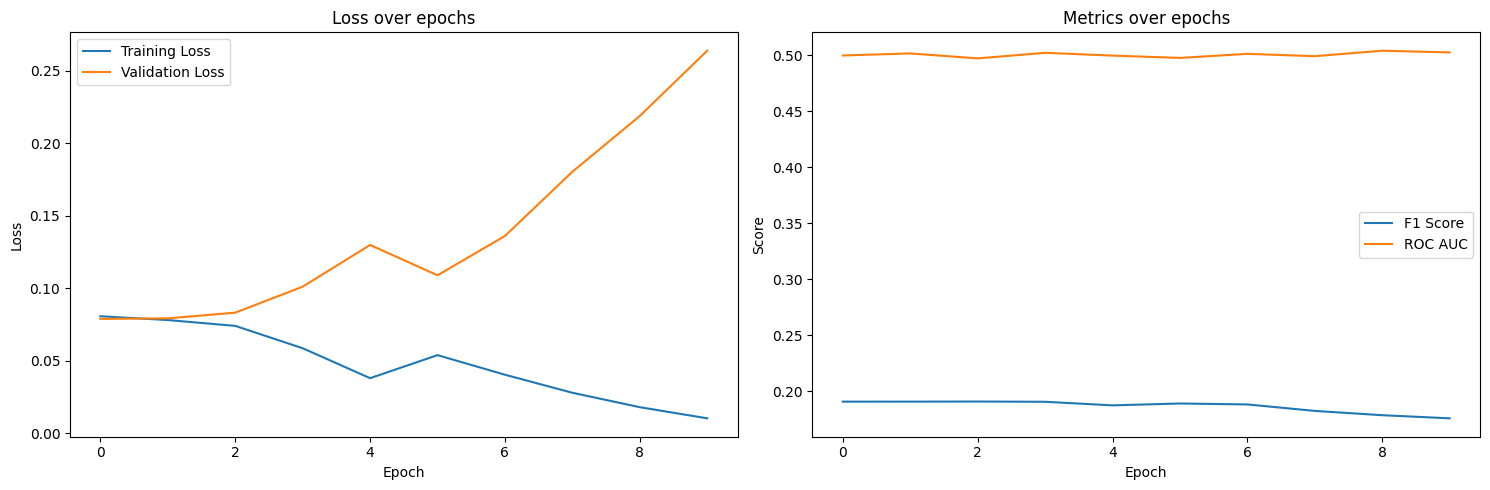

In [ ]:
import os
import random
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import timm
from torch.utils.data import DataLoader, Dataset, TensorDataset
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Monter Google Drive (s'il n'est pas déjà monté)
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

# Configuration
SEED = 42
IMG_SIZE = 224  # Taille d'image standard
BATCH_SIZE = 32  # Taille du batch
NUM_EPOCHS = 10  # Nombre d'époques
LEARNING_RATE = 3e-4  # Taux d'apprentissage
WEIGHT_DECAY = 1e-4  # Régularisation L2
FOCAL_GAMMA = 2.0  # Coefficient gamma pour la perte focale
PATIENCE = 10  # Patience pour l'early stopping

# Chemins des fichiers
BASE_PATH = "/content/drive/MyDrive/Diagnovision/filtered_df"
TRAIN_CSV_PATH = os.path.join(BASE_PATH, "train_df.csv")
VAL_CSV_PATH = os.path.join(BASE_PATH, "val_df.csv")
TEST_CSV_PATH = os.path.join(BASE_PATH, "test_df.csv")
TRAIN_TENSOR_PATH = os.path.join(BASE_PATH, "tensor_df/train_tensor_df.pt")

# Chemin de sauvegarde du modèle
MODEL_PATH = '/content/best_model_efficientnet_b0.pth'

# Détermination du dispositif
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

def set_seed(seed):
    """Définit les graines aléatoires pour la reproductibilité."""
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

# Définir la graine
set_seed(SEED)

# Classe pour la perte focale
class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2.0, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction
        self.bce = nn.BCEWithLogitsLoss(reduction='none')

    def forward(self, inputs, targets):
        BCE_loss = self.bce(inputs, targets)
        pt = torch.exp(-BCE_loss)  # Éviter une opération d'instabilité numérique
        F_loss = self.alpha * (1-pt)**self.gamma * BCE_loss

        if self.reduction == 'sum':
            return F_loss.sum()
        elif self.reduction == 'mean':
            return F_loss.mean()
        else:
            return F_loss

# Fonction pour calculer les métriques à différents seuils
def calculate_metrics_at_thresholds(y_true, y_prob, label_cols, thresholds=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]):
    results = {}
    best_f1 = 0
    best_threshold = 0.5

    for threshold in thresholds:
        y_pred = (y_prob >= threshold).astype(int)
        f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)
        precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
        recall = recall_score(y_true, y_pred, average='macro', zero_division=0)

        # Calculer l'AUC ROC par classe et faire la moyenne si possible
        roc_aucs = []
        for i in range(len(label_cols)):
            if len(np.unique(y_true[:, i])) > 1:  # Vérifier s'il y a au moins 2 classes
                try:
                    roc_auc = roc_auc_score(y_true[:, i], y_prob[:, i])
                    roc_aucs.append(roc_auc)
                except:
                    pass

        roc_auc = np.mean(roc_aucs) if roc_aucs else 0

        results[threshold] = {
            'f1': f1,
            'precision': precision,
            'recall': recall,
            'roc_auc': roc_auc
        }

        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    return results, best_threshold

# Charger les données
def load_data():
    """Charge les données depuis les fichiers CSV."""
    print("Loading data from CSV files...")

    # Vérifier que les fichiers existent
    for path in [TRAIN_CSV_PATH, VAL_CSV_PATH, TEST_CSV_PATH]:
        if not os.path.exists(path):
            print(f"Warning: File not found: {path}")

    # Charger les DataFrames
    train_df = pd.read_csv(TRAIN_CSV_PATH)
    val_df = pd.read_csv(VAL_CSV_PATH)
    test_df = pd.read_csv(TEST_CSV_PATH)

    print(f"Loaded datasets:")
    print(f"  Training: {len(train_df)} samples")
    print(f"  Validation: {len(val_df)} samples")
    print(f"  Test: {len(test_df)} samples")

    return train_df, val_df, test_df

# Préparer les données
def prepare_data(train_df, val_df, test_df):
    """Prépare les données en identifiant les colonnes d'étiquettes et en convertissant en nombres."""
    # Identifier les colonnes d'étiquettes
    # Exclure les colonnes qui ne sont pas des étiquettes
    exclusion_cols = []

    # Ajouter les colonnes d'ID, de chemin et de fold
    for col in train_df.columns:
        if (col.lower().endswith('id') or
            'path' in col.lower() or
            'fold' in col.lower() or
            col == 'Unnamed: 0'):
            exclusion_cols.append(col)

    # Définir les colonnes d'étiquettes
    label_cols = [col for col in train_df.columns if col not in exclusion_cols]

    print(f"Found {len(label_cols)} label columns: {label_cols}")

    # Convertir toutes les colonnes d'étiquettes en valeurs numériques
    for df in [train_df, val_df, test_df]:
        for col in label_cols:
            if col in df.columns:
                # Convertir en nombre si ce sont des chaînes de caractères
                if df[col].dtype == 'object':
                    print(f"Converting column {col} from {df[col].dtype} to numeric...")
                    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

    # Vérifier la distribution des étiquettes
    print("\nLabel distribution in training set:")
    for col in label_cols:
        if col in train_df.columns:
            pos_count = train_df[col].sum()
            pos_ratio = pos_count / len(train_df)
            print(f"  {col}: {pos_count} positive samples ({pos_ratio:.2%})")

    return label_cols

# TensorDataset pour utiliser les tenseurs prétraités
def load_tensor_dataset(tensor_path, df, label_cols):
    """Charge un TensorDataset à partir d'un fichier tenseur prétraité et d'un dataframe."""
    print(f"Loading tensor dataset from {tensor_path}...")

    # Charger le tenseur d'images prétraité
    try:
        images_tensor = torch.load(tensor_path)
        print(f"Loaded tensor with shape: {images_tensor.shape}")

        # Vérifier si le nombre d'échantillons correspond
        if len(images_tensor) != len(df):
            print(f"Warning: Number of samples in tensor ({len(images_tensor)}) doesn't match DataFrame ({len(df)})")
            print("Using a subset of the data...")
            min_samples = min(len(images_tensor), len(df))
            images_tensor = images_tensor[:min_samples]
            df = df.iloc[:min_samples].reset_index(drop=True)

        # Convertir les étiquettes en tenseur
        labels_tensor = torch.tensor(df[label_cols].values, dtype=torch.float32)

        # Créer le dataset
        tensor_dataset = TensorDataset(images_tensor, labels_tensor)
        print(f"Created TensorDataset with {len(tensor_dataset)} samples")

        return tensor_dataset

    except Exception as e:
        print(f"Error loading tensor dataset: {e}")
        print("Creating dummy dataset for debugging...")
        dummy_images = torch.rand(len(df), 3, IMG_SIZE, IMG_SIZE)
        dummy_labels = torch.tensor(df[label_cols].values, dtype=torch.float32)
        return TensorDataset(dummy_images, dummy_labels)

# Créer les dataloaders
def create_dataloaders(train_dataset, val_df, label_cols):
    """Crée les dataloaders pour l'entraînement et la validation."""
    print("Creating dataloaders...")

    # Pour l'entraînement, nous utilisons le tenseur prétraité
    train_loader = DataLoader(
        train_dataset,
        batch_size=BATCH_SIZE,
        shuffle=True,
        num_workers=2,
        pin_memory=True,
    )

    try:
        # Pour la validation, essayer de charger le tenseur de validation s'il existe
        val_tensor_path = TRAIN_TENSOR_PATH.replace("train_tensor_df.pt", "val_tensor_df.pt")
        if os.path.exists(val_tensor_path):
            print(f"Loading validation tensor dataset from {val_tensor_path}")
            val_dataset = load_tensor_dataset(val_tensor_path, val_df, label_cols)
        else:
            # Sinon, utiliser un dataset fictif
            print("Creating dummy validation dataset")
            val_dataset = TensorDataset(
                torch.rand(len(val_df), 3, IMG_SIZE, IMG_SIZE),
                torch.tensor(val_df[label_cols].values, dtype=torch.float32)
            )
    except:
        # En cas d'erreur, utiliser un dataset fictif
        print("Failed to load validation dataset, creating dummy dataset")
        val_dataset = TensorDataset(
            torch.rand(len(val_df), 3, IMG_SIZE, IMG_SIZE),
            torch.tensor(val_df[label_cols].values, dtype=torch.float32)
        )

    val_loader = DataLoader(
        val_dataset,
        batch_size=BATCH_SIZE,
        shuffle=False,
        num_workers=2,
        pin_memory=True,
    )

    print(f"Created dataloaders: {len(train_loader)} training batches, {len(val_loader)} validation batches")

    return train_loader, val_loader

# Initialisation du modèle EfficientNet
def initialize_model(num_classes):
    """Initialise un modèle EfficientNet-B0 avec une tête personnalisée."""
    print(f"Initializing EfficientNet-B0 model with {num_classes} output classes...")

    # Utiliser EfficientNet-B0
    model = timm.create_model('efficientnet_b0', pretrained=True)

    # Personnaliser la tête de classification
    in_features = model.classifier.in_features
    model.classifier = nn.Sequential(
        nn.Dropout(0.3),
        nn.Linear(in_features, num_classes)
    )

    # Déplacer sur le dispositif approprié
    model = model.to(device)
    print(f"Model moved to {device}")

    return model

# Fonctions d'entraînement et d'évaluation
def train_epoch(model, dataloader, criterion, optimizer, epoch):
    """Entraîne le modèle pour une époque."""
    model.train()
    running_loss = 0.0
    processed_samples = 0

    pbar = tqdm(dataloader, desc=f"Training epoch {epoch+1}")

    for step, (images, labels) in enumerate(pbar):
        images, labels = images.to(device), labels.to(device)
        batch_size = images.size(0)

        # Effacer les gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass et optimisation
        loss.backward()
        optimizer.step()

        # Mise à jour des métriques
        running_loss += loss.item() * batch_size
        processed_samples += batch_size

        # Mise à jour de la barre de progression
        pbar.set_postfix({'loss': running_loss/processed_samples})

    return running_loss / processed_samples

def evaluate_model(model, dataloader, criterion, label_cols):
    """Évalue le modèle sur un ensemble de données."""
    model.eval()
    running_loss = 0.0
    processed_samples = 0
    all_targets = []
    all_outputs = []

    with torch.no_grad():
        for images, labels in tqdm(dataloader, desc="Evaluating"):
            images, labels = images.to(device), labels.to(device)
            batch_size = images.size(0)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Mise à jour des métriques
            running_loss += loss.item() * batch_size
            processed_samples += batch_size

            # Convertir les sorties en probabilités
            probs = torch.sigmoid(outputs)

            all_targets.append(labels.cpu().numpy())
            all_outputs.append(probs.cpu().numpy())

    # Concaténer tous les résultats
    y_true = np.concatenate(all_targets)
    y_prob = np.concatenate(all_outputs)

    # Calculer les métriques à différents seuils
    metrics_by_threshold, best_threshold = calculate_metrics_at_thresholds(y_true, y_prob, label_cols)

    # Utiliser le meilleur seuil pour le rapport final
    y_pred = (y_prob >= best_threshold).astype(int)

    # Calculer les métriques globales
    val_loss = running_loss / processed_samples
    f1_macro = f1_score(y_true, y_pred, average='macro', zero_division=0)
    precision_macro = precision_score(y_true, y_pred, average='macro', zero_division=0)
    recall_macro = recall_score(y_true, y_pred, average='macro', zero_division=0)

    # Calculer l'AUC ROC moyen si possible
    roc_auc_macro = 0
    try:
        roc_aucs = []
        for i in range(len(label_cols)):
            if len(np.unique(y_true[:, i])) > 1:
                try:
                    roc_auc = roc_auc_score(y_true[:, i], y_prob[:, i])
                    roc_aucs.append(roc_auc)
                except:
                    pass
        roc_auc_macro = np.mean(roc_aucs) if roc_aucs else 0
    except Exception as e:
        print(f"Error calculating ROC AUC: {e}")

    return {
        'val_loss': val_loss,
        'f1_macro': f1_macro,
        'precision_macro': precision_macro,
        'recall_macro': recall_macro,
        'roc_auc_macro': roc_auc_macro,
        'best_threshold': best_threshold,
        'metrics_by_threshold': metrics_by_threshold
    }

def print_metrics(metrics, epoch):
    """Affiche les métriques d'évaluation."""
    print(f"\nEpoch {epoch+1} Validation Results:")
    print(f"Loss: {metrics['val_loss']:.4f}")
    print(f"Macro F1: {metrics['f1_macro']:.4f}")
    print(f"Macro Precision: {metrics['precision_macro']:.4f}")
    print(f"Macro Recall: {metrics['recall_macro']:.4f}")
    print(f"Macro ROC AUC: {metrics['roc_auc_macro']:.4f}")
    print(f"Best Threshold: {metrics['best_threshold']:.2f}")

    print("\nPerformance at different thresholds (Macro F1):")
    for threshold, values in metrics['metrics_by_threshold'].items():
        print(f"  Threshold {threshold:.1f}: F1={values['f1']:.4f}, Precision={values['precision']:.4f}, Recall={values['recall']:.4f}")

def plot_training_history(history):
    """Trace l'historique d'entraînement."""
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Loss over epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history['f1_macro'], label='F1 Score')
    plt.plot(history['roc_auc_macro'], label='ROC AUC')
    plt.title('Metrics over epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Score')
    plt.legend()

    plt.tight_layout()
    plt.savefig('training_history.png')
    plt.show()

# Fonction principale d'entraînement
def train_model():
    """Fonction principale d'entraînement du modèle."""
    set_seed(SEED)
    history = {
        'train_loss': [],
        'val_loss': [],
        'f1_macro': [],
        'roc_auc_macro': [],
        'lr': []
    }

    try:
        print("Starting training process...")

        # Charger et préparer les données
        train_df, val_df, test_df = load_data()
        label_cols = prepare_data(train_df, val_df, test_df)

        # Charger le dataset de tenseurs prétraités pour l'entraînement
        train_dataset = load_tensor_dataset(TRAIN_TENSOR_PATH, train_df, label_cols)

        # Créer les dataloaders
        train_loader, val_loader = create_dataloaders(train_dataset, val_df, label_cols)

        # Initialiser le modèle
        model = initialize_model(num_classes=len(label_cols))

        # Définir la perte, l'optimiseur et le scheduler
        criterion = FocalLoss(alpha=1, gamma=FOCAL_GAMMA)
        optimizer = optim.AdamW(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
        scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=5, T_mult=2, eta_min=1e-6)

        # Variables pour early stopping
        best_f1 = 0
        best_val_loss = float('inf')
        patience_counter = 0
        best_epoch = -1

        # Boucle d'entraînement
        for epoch in range(NUM_EPOCHS):
            # Entraînement
            train_loss = train_epoch(model, train_loader, criterion, optimizer, epoch)
            history['train_loss'].append(train_loss)

            # Évaluation
            metrics = evaluate_model(model, val_loader, criterion, label_cols)
            print_metrics(metrics, epoch)

            # Mise à jour de l'historique
            history['val_loss'].append(metrics['val_loss'])
            history['f1_macro'].append(metrics['f1_macro'])
            history['roc_auc_macro'].append(metrics['roc_auc_macro'])
            history['lr'].append(optimizer.param_groups[0]['lr'])

            # Mise à jour du scheduler
            scheduler.step()

            print(f"Learning rate: {optimizer.param_groups[0]['lr']:.6f}")

            # Sauvegarde du meilleur modèle
            improved_f1 = metrics['f1_macro'] > best_f1
            improved_loss = metrics['val_loss'] < best_val_loss

            if improved_f1 or improved_loss:
                if improved_f1:
                    best_f1 = metrics['f1_macro']
                    print(f"New best F1 score: {best_f1:.4f}")

                if improved_loss:
                    best_val_loss = metrics['val_loss']
                    print(f"New best validation loss: {best_val_loss:.4f}")

                # Sauvegarde du modèle
                torch.save({
                    'epoch': epoch,
                    'model_state_dict': model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    'best_f1': best_f1,
                    'best_val_loss': best_val_loss,
                    'best_threshold': metrics['best_threshold']
                }, MODEL_PATH)

                patience_counter = 0
                best_epoch = epoch
            else:
                patience_counter += 1
                print(f"No improvement for {patience_counter} epochs")

                if patience_counter >= PATIENCE:
                    print(f"Early stopping triggered after {epoch+1} epochs")
                    break

        # Afficher les résultats finaux
        print("\n=== Training Complete ===")
        print(f"Best epoch: {best_epoch+1}")
        print(f"Best F1 score: {best_f1:.4f}")
        print(f"Best validation loss: {best_val_loss:.4f}")

        # Tracer l'historique d'entraînement
        plot_training_history(history)

        return model, history

    except Exception as e:
        import traceback
        print(f"An error occurred: {e}")
        traceback.print_exc()
        return None, None

# Exécuter l'entraînement
if __name__ == "__main__":
    # Installer les dépendances requises si nécessaire
    try:
        import timm
    except ImportError:
        print("Installing required packages...")
        !pip install -q timm
        import timm

    model, history = train_model()


**evaluacion efficient0303**

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm
import timm  # Vous devrez installer: pip install timm

# Load the saved model
model_path = "/content/best_model_efficientnet_b0.pth"

# Chargez le checkpoint pour inspection
checkpoint = torch.load(model_path, map_location=torch.device("cuda" if torch.cuda.is_available() else "cpu"))

# Vérifions le nombre de classes dans le modèle sauvegardé
# We access the saved model's classifier layer's weights to get the number of classes
num_classes_saved = checkpoint['model_state_dict']['classifier.1.weight'].shape[0]
print(f"Nombre de classes dans le modèle sauvegardé: {num_classes_saved}")

# Créer un modèle qui correspond à l'architecture du modèle sauvegardé
# Nous utilisons timm qui a de nombreuses implémentations d'EfficientNet
model = timm.create_model('efficientnet_b0', pretrained=False)  # Use the same model architecture
# We create the classifier layer to match the saved model's structure
model.classifier = nn.Sequential(
    nn.Dropout(0.3),  # Assuming there was a Dropout layer before the Linear layer
    nn.Linear(model.classifier.in_features, num_classes_saved)
)

# Chargeons maintenant le modèle
model.load_state_dict(checkpoint['model_state_dict'])

# Afficher des informations du checkpoint pour vérification
print(f"Chargé depuis l'époque: {checkpoint['epoch']}")
print(f"Meilleur F1 score: {checkpoint['best_f1']}")
if 'best_threshold' in checkpoint:
    print(f"Meilleur seuil: {checkpoint['best_threshold']}")
    best_threshold = checkpoint['best_threshold']
else:
    best_threshold = 0.5
    print(f"Seuil par défaut utilisé: {best_threshold}")

# Continuer avec l'évaluation
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

# Evaluate on validation set
all_labels = []
all_preds = []
all_probs = []

with torch.no_grad():
    for images, labels in tqdm(val_dataloader, desc="Evaluating Model on Validation Set"):
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)

        # Si le modèle sauvegardé a plus de classes que nécessaire (ex: 13 au lieu de 12),
        # ne prendre que les 12 premières
        # Adjust the number of classes to match the labels if necessary
        if outputs.shape[1] != labels.shape[1]:
            outputs = outputs[:, :labels.shape[1]]

        probs = torch.sigmoid(outputs)  # Convert logits to probabilities
        preds = (probs > best_threshold).float()  # Convert to binary predictions

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

# Convert lists to NumPy arrays
all_labels = np.array(all_labels)
all_preds = np.array(all_preds)

# Compute evaluation metrics
accuracy = accuracy_score(all_labels, all_preds)
precision_micro = precision_score(all_labels, all_preds, average="micro", zero_division=0)
recall_micro = recall_score(all_labels, all_preds, average="micro", zero_division=0)
f1_micro = f1_score(all_labels, all_preds, average="micro", zero_division=0)

# Print results
print("\n🔹 **FINAL VALIDATION METRICS** 🔹")
print(f"Validation Accuracy: {accuracy * 100:.2f}%")
print(f"Validation Precision (Micro): {precision_micro:.4f}")
print(f"Validation Recall (Micro): {recall_micro:.4f}")
print(f"Validation F1 Score (Micro): {f1_micro:.4f}")

# Afficher des métriques par classe
if len(all_labels.shape) > 1 and all_labels.shape[1] > 1:  # Pour les classifications multi-labels
    print("\n🔹 **MÉTRIQUES PAR CLASSE** 🔹")
    class_precision = precision_score(all_labels, all_preds, average=None, zero_division=0)
    class_recall = recall_score(all_labels, all_preds, average=None, zero_division=0)
    class_f1 = f1_score(all_labels, all_preds, average=None, zero_division=0)

    for i in range(all_labels.shape[1]):
        print(f"Classe {i}:")
        print(f"  Precision: {class_precision[i]:.4f}")
        print(f"  Recall: {class_recall[i]:.4f}")
        print(f"  F1-Score: {class_f1[i]:.4f}")

Nombre de classes dans le modèle sauvegardé: 13
Chargé depuis l'époque: 2
Meilleur F1 score: 0.19089456440197755
Meilleur seuil: 0.1


Evaluating Model on Validation Set: 100%|██████████| 228/228 [00:08<00:00, 27.79it/s]


🔹 **FINAL VALIDATION METRICS** 🔹
Validation Accuracy: 19.15%
Validation Precision (Micro): 0.4020
Validation Recall (Micro): 0.0517
Validation F1 Score (Micro): 0.0916

🔹 **MÉTRIQUES PAR CLASSE** 🔹
Classe 0:
  Precision: 0.2500
  Recall: 0.0023
  F1-Score: 0.0046
Classe 1:
  Precision: 0.3750
  Recall: 0.0038
  F1-Score: 0.0076
Classe 2:
  Precision: 0.4227
  Recall: 0.1567
  F1-Score: 0.2286
Classe 3:
  Precision: 0.0000
  Recall: 0.0000
  F1-Score: 0.0000
Classe 4:
  Precision: 0.2000
  Recall: 0.0006
  F1-Score: 0.0013
Classe 5:
  Precision: 0.0000
  Recall: 0.0000
  F1-Score: 0.0000
Classe 6:
  Precision: 0.0000
  Recall: 0.0000
  F1-Score: 0.0000
Classe 7:
  Precision: 0.1000
  Recall: 0.0009
  F1-Score: 0.0017
Classe 8:
  Precision: 0.0000
  Recall: 0.0000
  F1-Score: 0.0000
Classe 9:
  Precision: 0.3319
  Recall: 0.0335
  F1-Score: 0.0608
Classe 10:
  Precision: 0.0000
  Recall: 0.0000
  F1-Score: 0.0000
Classe 11:
  Precision: 0.0000
  Recall: 0.0000
  F1-Score: 0.0000


**to eval in TEST**

**test dataloader**

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

# Cargar el dataset de test como tensor mapeado
test_tensor_path = "/content/drive/MyDrive/Diagnovision/filtered_df/tensor_df/test_tensor_df.pt"
all_test_data = torch.load(test_tensor_path, map_location="cpu")

# Crear una clase Dataset para el test
class MemoryMappedDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

# Crear el DataLoader de test
test_dataset = MemoryMappedDataset(all_test_data)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

print("✅ DataLoader de test cargado correctamente")


✅ DataLoader de test cargado correctamente


In [ ]:
import torch
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm
import timm  # Make sure timm is installed: !pip install timm
import torch.nn as nn

# Define model_paths with your list of model paths.
# Assuming you only want to evaluate the one model saved in 'model_path'
model_paths = [model_path]

# 📌 **Dispositivo (GPU si está disponible)**
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 📌 **Evaluar cada modelo en test**
for model_path in model_paths:
    print(f"\n🔹 Evaluating Model: {model_path}")

    # **Cargar modelo**
    # Load the correct model architecture (efficientnet_b0)
    model = timm.create_model('efficientnet_b0', pretrained=False)

    # Get the number of classes and the best threshold from the saved checkpoint
    checkpoint = torch.load(model_path, map_location=device)
    num_classes_saved = checkpoint['model_state_dict']['classifier.1.weight'].shape[0]
    best_threshold = checkpoint.get('best_threshold', 0.5) # Get best_threshold or default to 0.5

    # Recreate the classifier layer to match the saved model
    model.classifier = nn.Sequential(
        nn.Dropout(0.3),
        nn.Linear(model.classifier.in_features, num_classes_saved)
    )

    # **Cargar pesos guardados**
    model.load_state_dict(checkpoint['model_state_dict']) # Load only the model state dict
    model.to(device)
    model.eval()

    # **Inicializar métricas**
    all_labels = []
    all_preds = []

    # **Evaluar en test**
    with torch.no_grad():
        for images, labels in tqdm(test_dataloader, desc="Evaluating Model on Test Set"):
            images, labels = images.to(device), labels.to(device)

            # **Predicciones**
            outputs = model(images)

            # Adjust the number of classes to match the labels if necessary
            if outputs.shape[1] != labels.shape[1]:
                outputs = outputs[:, :labels.shape[1]]

            probs = torch.sigmoid(outputs)  # Logits a probabilidades
            preds = (probs > best_threshold).float()  # Convertir a binario using best_threshold

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

    # **Convertir a NumPy**
    all_labels = np.array(all_labels)
    all_preds = np.array(all_preds)

    # **Calcular métricas**
    accuracy = accuracy_score(all_labels, all_preds)
    precision_micro = precision_score(all_labels, all_preds, average="micro", zero_division=0)
    recall_micro = recall_score(all_labels, all_preds, average="micro", zero_division=0)
    f1_micro = f1_score(all_labels, all_preds, average="micro", zero_division=0)

    # **Imprimir resultados**
    print("\n🔹 **FINAL TEST METRICS** 🔹")
    print(f"Test Accuracy: {accuracy * 100:.2f}%")
    print(f"Test Precision (Micro): {precision_micro:.4f}")
    print(f"Test Recall (Micro): {recall_micro:.4f}")
    print(f"Test F1 Score (Micro): {f1_micro:.4f}")


🔹 Evaluating Model: /content/best_model_efficientnet_b0.pth


Evaluating Model on Test Set: 100%|██████████| 229/229 [00:08<00:00, 26.99it/s]


🔹 **FINAL TEST METRICS** 🔹
Test Accuracy: 19.14%
Test Precision (Micro): 0.3910
Test Recall (Micro): 0.0538
Test F1 Score (Micro): 0.0946
